In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Convolution1D, Dropout, MaxPool1D, Convolution2D, MaxPool2D
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from keras.layers import LSTM
from keras import regularizers

In [2]:
#Loading and preparing the Dataset
#df=pd.read_csv("Feature_Matrix_All.csv")

#df= pd.read_csv('Sub1(Fz,F3,F4) Channels Data.csv')  #Subject 1

#df= pd.read_csv('Sub2(Fz,F3,F4) Channels Data.csv') #Subject 2

df= pd.read_csv('Sub3(Fz,F3,F4) Channels Data.csv')  #Subject 3

ndf=df.drop(['Mode','Min','Max','Median'],axis=1)

#Normalization
dataf=((ndf-ndf.min())/(ndf.max()-ndf.min()))
dataf

#Test and train
X=dataf.drop(['Class'], axis = 1)
y=dataf.Class

X.shape

(360, 5)

In [3]:
# Reshape Data 2D to 3D for LSTM Input
X=np.array(ndf.iloc[:,:-1])
y=np.array(ndf.iloc[:,-1])
X= X.reshape(-1,5,1)
X.shape

(360, 5, 1)

In [4]:
# Select train-test split size
test_size = 0.3
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [5]:
# Long Short Term Memory (LSTM) Model

model = Sequential()
model.add(LSTM(500, input_shape=(5,1),activation='relu'))
#model.add(Dropout(0.2))
#model.add(LSTM(200,input_shape=(5,1),activation='relu'))

model.add(Flatten())

model.add(Dense(250, activation='relu'))
model.add(Dropout(0.2))

#model.add(Dense(500, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
#model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history= model.fit(X_train,y_train, epochs=250, verbose=0, validation_data=(X_test,y_test))
    

In [6]:
# list all data in history
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

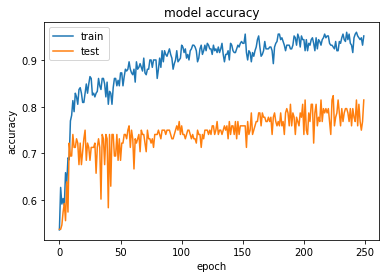

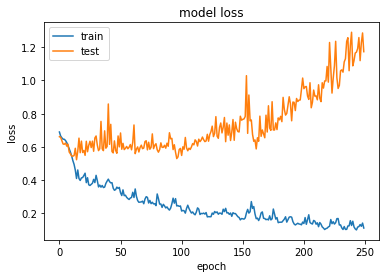

In [7]:
# summarize history for accuracy (Accuracy Curve)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
fig2 = plt.gcf()
# show the plot
plt.show()
#Save figure 
#fig2.savefig('C:/Users/RAIAN/Desktop/Ongoing Task/EEG Driving/Result and Discussion/Deep Learning/Subject 3/Accuracy Curve/LSTM_Accuracy Curve.png', dpi=500)
#fig2.savefig('C:/Users/RAIAN/Desktop/Ongoing Task/EEG Driving/Result and Discussion/Deep Learning/All Subject/Accuracy Curve/LSTM_ACC Curve.png', dpi=500)

# summarize history for loss (Loss Curve)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
fig1 = plt.gcf()
# show the plot
plt.show()
#Save figure 
#fig1.savefig('C:/Users/RAIAN/Desktop/Ongoing Task/EEG Driving/Result and Discussion/Deep Learning/Subject 3/Loss Curve/LSTM_Loss Curve.png', dpi=500)
#fig1.savefig('C:/Users/RAIAN/Desktop/Ongoing Task/EEG Driving/Result and Discussion/Deep Learning/All Subject/Loss Curve/LSTM_Loss Curve.png', dpi=500)


In [8]:
# predict probabilities for test set
yhat_probs = model.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = model.predict_classes(X_test, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [9]:
# Results for LSTM

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)

Accuracy: 0.814815
Precision: 0.711864
Recall: 0.933333
F1 score: 0.807692
ROC AUC: 0.819929
[[46 17]
 [ 3 42]]


In [11]:
#Loading and preparing the Dataset for 1D-CNN

df=df.drop(['Mode','Mean','Skewness','Median'],axis=1)

#Normalization
dataf=((df-df.min())/(df.max()-df.min()))
dataf

#Test and train
X=dataf.drop(['Class'], axis = 1)
y=dataf.Class

X.shape


(360, 5)

In [12]:
# 1D CNN Model

model2 = Sequential()
model2.add(Convolution1D(filters=64, kernel_size=3, input_shape=(5,1),activation= "relu",kernel_regularizer=regularizers.l2(0.01)))
model2.add(Convolution1D(filters=32, kernel_size=1, activation='relu',kernel_regularizer=regularizers.l2(0.01)))

model2.add(MaxPool1D(pool_size=2))
#model.add(Dropout(0.5))
model2.add(Flatten())
model2.add(Dense(50, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
#model.add(Dense(2500, activation='relu'))
#model.add(Dropout(0.2))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(optimizer= 'adam',
                loss = 'binary_crossentropy',
                metrics = ['accuracy'] )
    
history2= model2.fit(X_train,y_train, epochs=250, verbose=0, batch_size=32, validation_data=(X_test,y_test))

In [13]:
# predict probabilities for test set
yhat_probs2 = model2.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes2 = model2.predict_classes(X_test, verbose=0)
# reduce to 1d array
yhat_probs2 = yhat_probs2[:, 0]
yhat_classes2 = yhat_classes2[:, 0]

In [14]:
# Results for 1D CNN

# accuracy: (tp + tn) / (p + n)
accuracy2 = accuracy_score(y_test, yhat_classes2)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision2 = precision_score(y_test, yhat_classes2)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall2 = recall_score(y_test, yhat_classes2)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f12 = f1_score(y_test, yhat_classes2)
print('F1 score: %f' % f1)
# ROC AUC
auc2 = roc_auc_score(y_test, yhat_probs2)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix2 = confusion_matrix(y_test, yhat_classes2)
print(matrix)

Accuracy: 0.814815
Precision: 0.711864
Recall: 0.933333
F1 score: 0.807692
ROC AUC: 0.819929
[[46 17]
 [ 3 42]]


In [15]:
# Prepare Data for ANN Model
#Test and train
X_new=dataf.drop(['Class'], axis = 1)
y_new=dataf.Class

X_new.shape

(360, 5)

In [16]:
# Select train-test split size

test_size = 0.3
seed = 42
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_new, y_new, test_size=test_size, random_state=seed)

X_train2.shape

(252, 5)

In [17]:
#ANN Model

model3 = Sequential()
model3.add(Dense(500, input_dim=5, activation='relu',kernel_regularizer=regularizers.l2(0.015)))
#model.add(Dropout(0.2))

model3.add(Dense(250, activation='relu'))
#model.add(Dropout(0.05))

#model.add(Dense(2500, activation='relu'))
#model.add(Dropout(0.2))

#model.add(Dense(2000, activation='relu'))

model3.add(Dense(1, activation='sigmoid'))

model3.compile(optimizer= 'adam',
                loss = 'binary_crossentropy',
                metrics = ['accuracy'] )
    
history3= model3.fit(X_train2,y_train2, epochs=250, verbose=0, batch_size=64, validation_data=(X_test2,y_test2))

In [18]:
# predict probabilities for test set
yhat_probs3 = model3.predict(X_test2, verbose=0)
# predict crisp classes for test set
yhat_classes3 = model3.predict_classes(X_test2, verbose=0)
# reduce to 1d array
yhat_probs3 = yhat_probs3[:, 0]
yhat_classes3 = yhat_classes3[:, 0]

In [19]:
# Results for ANN

# accuracy: (tp + tn) / (p + n)
accuracy3 = accuracy_score(y_test2, yhat_classes3)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision3 = precision_score(y_test2, yhat_classes3)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall3 = recall_score(y_test2, yhat_classes3)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f13 = f1_score(y_test2, yhat_classes3)
print('F1 score: %f' % f1)
# ROC AUC
auc3 = roc_auc_score(y_test2, yhat_probs3)
print('ROC AUC: %f' % auc3)
# confusion matrix
matrix3 = confusion_matrix(y_test2, yhat_classes3)
print(matrix)

Accuracy: 0.814815
Precision: 0.711864
Recall: 0.933333
F1 score: 0.807692
ROC AUC: 0.827866
[[46 17]
 [ 3 42]]


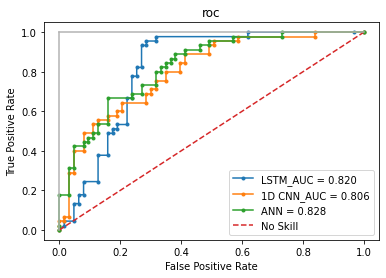

In [20]:
# ROC-AUC for All Three Models

false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, yhat_probs)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, yhat_probs2)
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y_test2, yhat_probs3)
#plt.subplots(1, figsize=(6,5))
plt.title('roc')
plt.plot(false_positive_rate1, true_positive_rate1, marker='.', label='LSTM_AUC = %0.3f' %auc)
plt.plot(false_positive_rate2, true_positive_rate2, marker='.', label='1D CNN_AUC = %0.3f' %auc2)
plt.plot(false_positive_rate3, true_positive_rate3, marker='.', label='ANN = %0.3f' %auc3)
plt.plot([0, 1], ls="--",label='No Skill')
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
fig3 = plt.gcf()
# show the plot
plt.show()
fig3.savefig('D:/Subject 3_ROC.png', dpi=500)